<a href="https://colab.research.google.com/github/EPDataAnalyst/githubtest/blob/main/ArrestData_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Python Project 3
The goal of this project was to analyze NYPD arrest data with comparison points. I have picked the boroughs of NYC and sexual felonies. My task included one data cleaning task with descriptive statistics with a data visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the Data
df = pd.read_csv('/content/drive/MyDrive/Arrest_Data_NYPD/NYPD_Arrest_Data__Year_to_Date__20231226.csv')

In [3]:
#This is view of the different data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [4]:
df.head() #This is  another view of the top of head post import.

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,...,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),16.0,2.0,49.0,49.0,17618.0
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,...,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),55.0,2.0,25.0,46.0,17614.0
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,...,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),1.0,2.0,44.0,37.0,17616.0
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),18.0,4.0,36.0,20.0,12427.0
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,...,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),16.0,2.0,48.0,49.0,17615.0


In [5]:
df.describe() #Five point Summary of the Data. I was looking to see how the data was distributed.

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000,170080.000000,170076.000000,170080.000000,170080.000000,169720.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525,36.645232,3.337314,27.384678,39.057467,14531.892782
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134,21.104742,1.224858,14.503475,21.449572,3923.302561
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187,1.000000,1.000000,1.000000,1.000000,10090.000000
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365,17.000000,2.000000,13.000000,23.000000,11606.000000
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234,41.000000,3.000000,29.000000,37.000000,13094.000000
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333,55.000000,4.000000,40.000000,59.000000,17213.000000
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000,71.000000,5.000000,51.000000,77.000000,24894.000000


In [6]:
df.head().columns #This was a view of the columns in the dataset.

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'Community Districts', 'Borough Boundaries', 'City Council Districts',
       'Police Precincts', 'Zip Codes'],
      dtype='object')

In [7]:
df['OFNS_DESC'].unique() #This is a unique look at the offenses in in the discription column.

array(['FELONY ASSAULT', 'DANGEROUS DRUGS', 'RAPE', 'FORGERY', 'BURGLARY',
       'ARSON', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'PETIT LARCENY', 'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW',
       'HARRASSMENT 2', 'OFF. AGNST PUB ORD SENSBLTY &', 'JOSTLING',
       'SEX CRIMES', '(null)', 'FRAUDS', 'CRIMINAL TRESPASS', 'ESCAPE 3',
       'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES INVOLVING FRAUD', 'INTOXICATED & IMPAIRED DRIVING',
       'FOR OTHER AUTHORITIES', 'OTHER OFFENSES RELATED TO THEF',
       'POSSESSION OF STOLEN PROPERTY', 'OTHER TRAFFIC INFRACTION',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'OTHER STATE LAWS (NON PENAL LA',
       'PROSTITUTION & RELATED OFFENSES', 'GAMBLING',
       'OFFENSES AGAINST PUBLIC ADMINI', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'OTHER STATE LAWS', 'CANNABIS RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST PUBLIC SAFETY',
       'GRAND LARCENY OF 

In [8]:
#This is a count of the different offenses by borough
df.groupby(df['OFNS_DESC'])['ARREST_BORO'].count().sort_values(ascending=False).head(20)


OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
OFFENSES AGAINST PUBLIC ADMINI     5148
BURGLARY                           4753
OTHER OFFENSES RELATED TO THEF     4123
SEX CRIMES                         3901
OFFENSES INVOLVING FRAUD           3846
OFF. AGNST PUB ORD SENSBLTY &      3044
POSSESSION OF STOLEN PROPERTY      2738
FORGERY                            2591
INTOXICATED & IMPAIRED DRIVING     1953
OTHER TRAFFIC INFRACTION           1615
Name: ARREST_BORO, dtype: int64

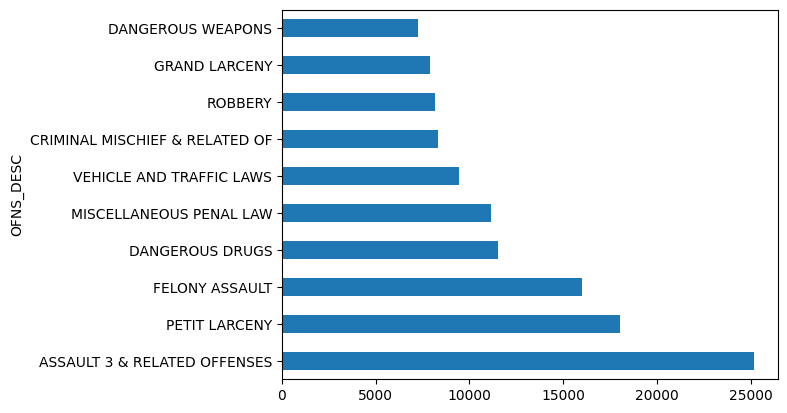

In [9]:
df.groupby(df['OFNS_DESC'])['ARREST_BORO'].count().sort_values(ascending=False).head(10).plot(kind = 'barh')
plt.xticks(rotation = 0)
plt.show()
#This is visualization of the top 10 offenses across all boroughs.

In [10]:
crime_by_borough = df['ARREST_BORO'].value_counts()

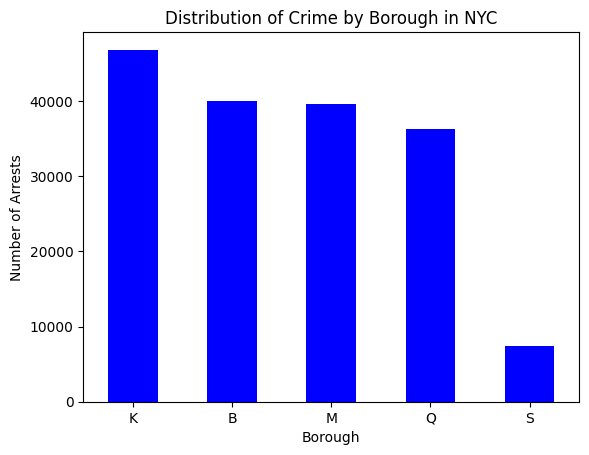

In [34]:
#This a distribution of crime borough by borough.
crime_by_borough.plot(kind='bar', color='blue')
plt.title('Distribution of Crime by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks(rotation = 0)
plt.show()



##Data Cleansing

In [42]:



df['OFNS_DESC'] = df['OFNS_DESC'].astype(str)

In [41]:
##This is view of the filtered sex/rape subset.
sex_felonies = df[df['OFNS_DESC'].str.contains('sex|RAPE', case=False)]
sex_felonies.head()


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
7,264579718,03/04/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,...,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884),61.0,2.0,11.0,40.0,13510.0
17,265199935,03/16/2023,157,RAPE 1,104.0,RAPE,PL 1303504,F,K,84,...,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),68.0,2.0,48.0,54.0,16865.0
19,265419933,03/21/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,...,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),16.0,2.0,49.0,49.0,17615.0
20,263551062,02/13/2023,157,RAPE 1,104.0,RAPE,PL 1303501,F,K,75,...,1017036,183890,40.671360,-73.881811,POINT (-73.8818110231735 40.6713598203364),45.0,2.0,25.0,47.0,17215.0
22,267689461,05/03/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,Q,100,...,1035329,152802,40.585943,-73.816102,POINT (-73.8161019228725 40.5859433449759),51.0,3.0,41.0,58.0,20531.0


In [22]:
sex_felonies.shape #This is a shape of the sex felonies in the dataset.

(4432, 24)

In [29]:
sex_felonies.groupby(df['ARREST_BORO'])['OFNS_DESC'].count()

ARREST_BORO
B    1016
K    1013
M     826
Q    1419
S     158
Name: OFNS_DESC, dtype: int64

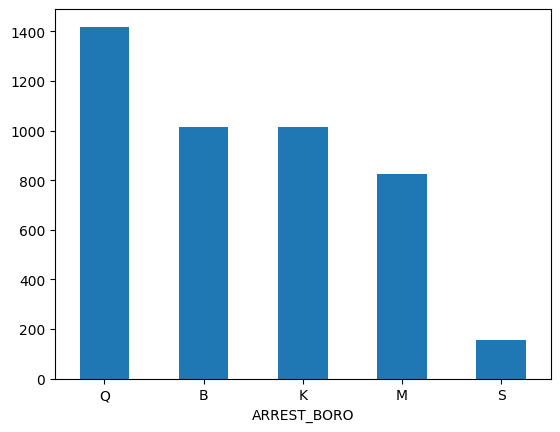

In [32]:
sex_felonies.groupby(df['ARREST_BORO'])['OFNS_DESC'].count().sort_values(ascending = False).plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()


##Summary Analysis




The dataset under examination comprised 24 distinct columns, capturing various aspects of criminal incidents. Of particular significance was the "Offense Description" column, delineating a comprehensive array of criminal offenses, totaling no fewer than 60 distinct categories.

The predominant offense observed in the dataset was 3rd-degree assault and other offenses, constituting the focal point with 25,200 recorded incidents. Notably, this highlights a significant prevalence of such offenses within the analyzed data.

Delving into sexual felonies, the borough of Queens took the lead among its counterparts, registering 1,419 incidents related to offenses such as rape. This underscores a critical aspect of criminal activity within the borough and emphasizes the need for targeted interventions and law enforcement efforts in this domain.

Interestingly, despite Queens leading in sexual felonies, Brooklyn emerged as the borough with the highest overall number of arrests. This suggests a diverse spectrum of criminal activities in Brooklyn, reinforcing the multifaceted nature of law enforcement challenges in this particular borough.

In conclusion, the analysis provides valuable insights into the dataset's composition, shedding light on the prevalence of specific criminal offenses, variations across boroughs, and the distinct challenges each area poses for law enforcement.

